In [1]:
%pylab inline
import sys
import pandas as pd
import numpy as np
import datetime
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
from yahoo_finance import Share

Populating the interactive namespace from numpy and matplotlib


In [2]:
symbol="XLF"
marketdata=Share(symbol)
data=marketdata.get_historical('2010-01-10','2016-04-28' )
data=pd.DataFrame(data)
data.index = data.Date
prices=data.Adj_Close
#prices=np.asarray(list(prices))
prices=prices.astype(float)

In [3]:
kf=KalmanFilter(transition_matrices=[[1,1],[0,1]],observation_matrices=[[1,0]],
                initial_state_mean=[prices[0],0],transition_covariance=[[.0035,0],[0,0.0035]],
                observation_covariance=10)
# kf=kf.em(prices,n_iter=5)
(a,b)=kf.filter(prices)

In [4]:
data = pd.DataFrame()
data['prices']= prices
data['kalman_price'] = a[:,0]
data['kalman_vel'] = a[:,1]
data['kalman_predict'] = a[:,0]+a[:,1]

In [5]:
data.head()

,prices,kalman_price,kalman_vel,kalman_predict
Date,,,,
2016-04-26,23.650000,23.650000,0.000000,23.650000
2016-04-25,23.500000,23.625917,-0.012592,23.613325
2016-04-22,23.549999,23.594572,-0.020432,23.574140
2016-04-21,23.330000,23.481204,-0.049816,23.431387
2016-04-20,23.540001,23.474933,-0.038895,23.436038


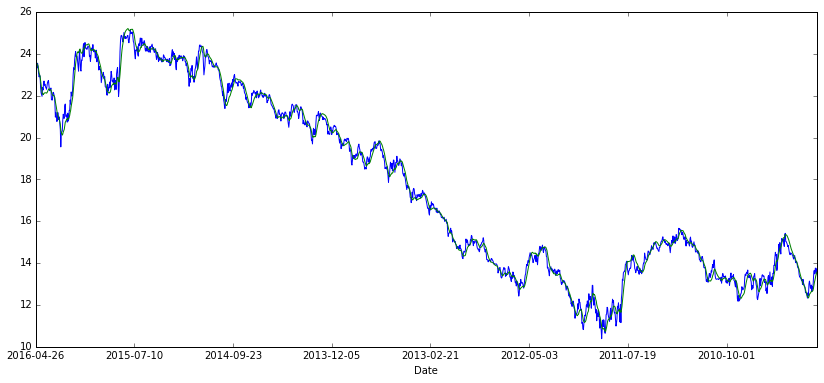

In [6]:
data.prices.plot(figsize=(14,6))
data.kalman_price.plot()

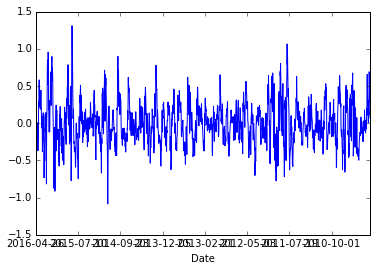

In [7]:
data['resids'] = data.prices - data.kalman_price
data.resids.plot()

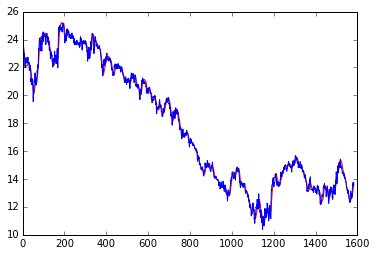

In [8]:
plt.plot(a[:,0],'r-')
plt.plot(prices,'b-')
plt.show()

<function matplotlib.pyplot.show>

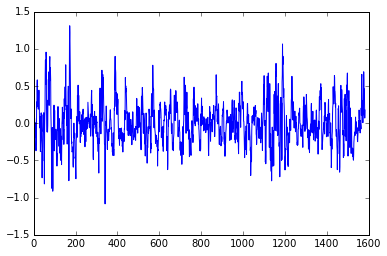

In [28]:
c=prices-a[:,0]
plt.plot(c)
plt.show

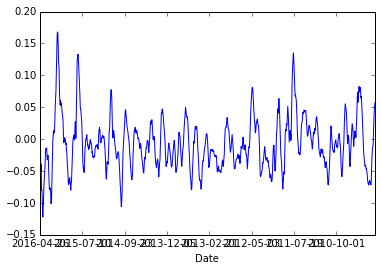

In [59]:
data.kalman_vel.plot()

<function matplotlib.pyplot.show>

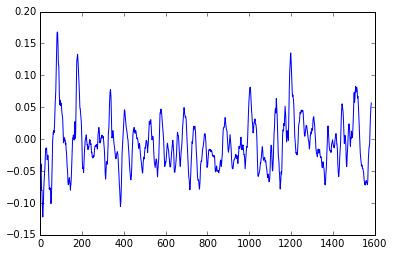

In [7]:
plt.plot(a[:,1])
plt.show


In [29]:
diffdiff=c
max=0
signal=0
buysell= []
threshold=5
for i in range(1,len(diffdiff)):
    if (abs(diffdiff[i])> max):
            max=abs(diffdiff[i])
            signal=0
    else:
        if (diffdiff[i]>0):
            signal = -1
        else:
            signal = 1
    if(diffdiff[i]*diffdiff[i-1]<= 0):
        signal=0
        max=abs(diffdiff[i])
    buysell.append(signal)

In [50]:
def get_positions(df):
    diffdiff=df.resids
    max=0
    signal=0
    buysell= []
    #threshold=5
    for i in range(len(diffdiff)):
        if (abs(diffdiff[i])> max):
            max=abs(diffdiff[i])
            signal=0
        else:
            if (diffdiff[i]>0):
                signal = -1
            else:
                signal = 1
        if(diffdiff[i]*diffdiff[i-1]<= 0):
            signal=0
            max=abs(diffdiff[i])
        buysell.append(signal)
    return buysell

In [51]:
bs = get_positions(data)

In [52]:
data.shape

(1584, 8)

In [53]:
len(bs)

1584

In [54]:
data['position']= bs

In [55]:
data.head()

,prices,kalman_price,kalman_vel,kalman_predict,resids,position,daily_rets,returns
Date,,,,,,,,
2016-04-26,23.650000,23.650000,0.000000,23.650000,0.000000,0,-0.006342,-0.000000
2016-04-25,23.500000,23.625917,-0.012592,23.613325,-0.125917,0,0.002128,0.002128
2016-04-22,23.549999,23.594572,-0.020432,23.574140,-0.044573,1,-0.009342,-0.000000
2016-04-21,23.330000,23.481204,-0.049816,23.431387,-0.151204,0,0.009001,0.000000
2016-04-20,23.540001,23.474933,-0.038895,23.436038,0.065068,0,-0.007647,-0.000000


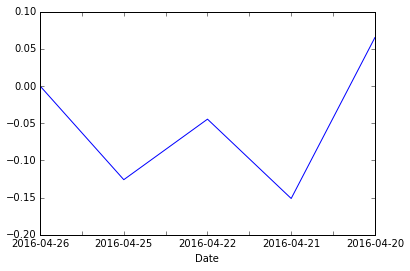

In [59]:
data.resids.head().plot()

In [16]:
data['daily_rets'] = (data['prices'].shift(-1) - data['prices']) / data['prices']

In [49]:
data.prices.shift(-1).head()

Date
2016-04-26    23.500000
2016-04-25    23.549999
2016-04-22    23.330000
2016-04-21    23.540001
2016-04-20    23.360001
Name: prices, dtype: float64

In [56]:
data['returns'] = data.position.shift(-1) * data.daily_rets

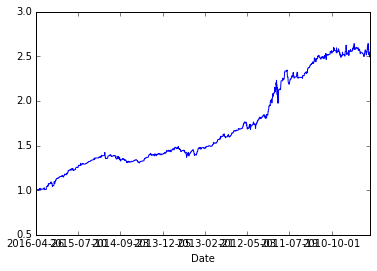

In [57]:
np.cumprod(data.returns+1).plot()

In [9]:
len(buysell), len(diffdiff)


(1583, 1584)

In [10]:
len(diffdiff[1:])


1583

In [11]:
d=pd.DataFrame(buysell,diffdiff[1:])


In [12]:
returns=(prices[1:]-prices[0:-1])/prices[0:-1]
tradereturns=returns*buysell

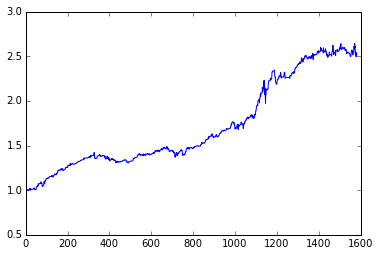

In [13]:
plt.plot(np.cumprod(1+tradereturns))
plt.show()

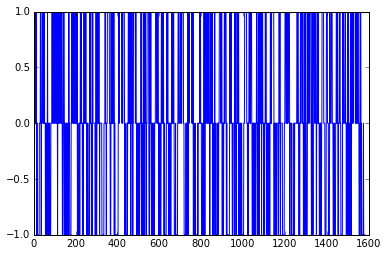

In [30]:
plt.plot(buysell)
plt.show()



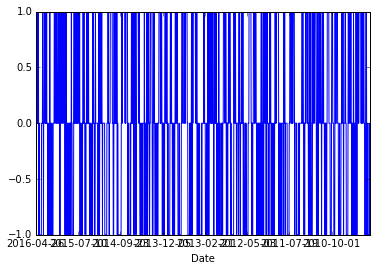

In [26]:
data.position.plot()

In [31]:
data.position.shape

(1584,)

In [32]:
len(buysell)

1583

In [36]:
buysell[:10]

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [39]:
p = data.position.tolist()

In [41]:
for i in range
p[1:] - buysell

TypeError: unsupported operand type(s) for -: 'list' and 'list'